In [78]:
import pandas as pd
import numpy as np

In [3]:
input_file = "../data/london_weather.csv"
df = pd.read_csv(input_file, parse_dates=True)

In [4]:
df['date'] = pd.to_datetime(df["date"],format='%Y%m%d')
df['year'] = df['date'].dt.year
df['month'] = df["date"].dt.month.map("{:02}".format)

In [7]:
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,year,month
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,1979,01
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,1979,01
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,1979,01
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0,1979,01
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0,1979,01


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error

from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.linear_model import Lasso

# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.feature_extraction import DictVectorizer

# from sklearn.linear_model import Ridge



In [6]:
weather_all_features = df.drop(["mean_temp", "date"], axis=1).columns.to_list()
weather_features = ['month', 'max_temp', 'min_temp', 'global_radiation', 'sunshine', 'cloud_cover', 'snow_depth']
# weather_features = ['month', 'cloud_cover', 'sunshine', 'precipitation', 'pressure', 'global_radiation']
weather_target = "mean_temp"
df_weather = df.copy()
df_weather['mean_temp'] = df_weather.fillna(df_weather['mean_temp'].mean())['mean_temp']

In [7]:
# Subset feature and target sets
# X = df_weather[weather_all_features]    
X = df_weather[weather_features]  
y = df_weather[weather_target]
    
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X[0:2])
print(type(X))
print("The selected features are : ", X_train.columns)
feature_index = X_train.columns
    
# Impute missing values
imputer = SimpleImputer(strategy="mean")
# Fit on the training data
X_train = imputer.fit_transform(X_train)
# Transform on the test data
X_test  = imputer.transform(X_test)
    
# Scale the data
scaler = StandardScaler()
# Fit on the training data
X_train = scaler.fit_transform(X_train)
# Transform on the test data
X_test = scaler.transform(X_test)  

  month  max_temp  min_temp  global_radiation  sunshine  cloud_cover  \
0    01       2.3      -7.5              52.0       7.0          2.0   
1    01       1.6      -7.5              27.0       1.7          6.0   

   snow_depth  
0         9.0  
1         8.0  
<class 'pandas.core.frame.DataFrame'>
The selected features are :  Index(['month', 'max_temp', 'min_temp', 'global_radiation', 'sunshine',
       'cloud_cover', 'snow_depth'],
      dtype='object')


In [8]:
lin_reg = LinearRegression().fit(X_train, y_train)
# Evaluate performance
y_pred_lin_reg = lin_reg.predict(X_test)
lin_reg_rmse = mean_squared_error(y_test, y_pred_lin_reg, squared=False)
print("The RMSE for linear regression : ", lin_reg_rmse)

The RMSE for linear regression :  0.9185580582720516


In [9]:
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)
pred_labels_xgb = xgb_model.predict(X_test)
print('prediction Labels for XGBoost Model:',pred_labels_xgb)
xgb_rmse = mean_squared_error(y_test, pred_labels_xgb, squared=False)
print("The RMSE for XGBoost : ", xgb_rmse)


prediction Labels for XGBoost Model: [16.666426 15.220022 12.88803  ... 20.972408  7.422984 16.782743]
The RMSE for XGBoost :  0.9237768148252309


In [10]:
# Lasso
alpha = 0.1
lasso_reg = Lasso(alpha, random_state=42)
lasso_reg.fit(X_train, y_train)

pred_labels_lasso = lasso_reg.predict(X_test)
lasso_rmse = mean_squared_error(y_test, pred_labels_lasso, squared=False)
print("The RMSE for Lasso Regression : ", lasso_rmse)

The RMSE for Lasso Regression :  0.9320223525561097


In [23]:
!pip install lazypredict
!pip install lazypredict-nightly

  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.5
    Uninstalling MarkupSafe-2.1.5:
      Successfully uninstalled MarkupSafe-2.1.5


In [24]:
!pip freeze | grep scikit-learn

scikit-learn==1.0.2


In [26]:
# Use the lazypredict package to do some baseline
import lazypredict 
from lazypredict import Supervised 
from lazypredict.Supervised import LazyRegressor

In [ ]:
# Had to change the parameter "sparse" to "sparse_output" on the OneHotEncoder function in the following file
#  ~/.local/share/virtualenvs/mlops_temperature_prediction-M3ZLPW1f/lib/python3.9/site-packages/lazypredict/Supervised.py

In [28]:
# https://github.com/sanskar-hasija/lazypredict/blob/main/Regression/LazyPredict%20Regression.ipynb
%%time
reg = LazyRegressor(verbose=0,
                     ignore_warnings=True,
                     custom_metric=None,
                     random_state=12,
                     regressors='all',
                    )
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

 98%|█████████████████████████████████████████████████████████████████████████████████  | 41/42 [02:45<00:01,  1.90s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007262 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 939
[LightGBM] [Info] Number of data points in the train set: 10278, number of used features: 7
[LightGBM] [Info] Start training from score 11.487968


100%|███████████████████████████████████████████████████████████████████████████████████| 42/42 [02:46<00:00,  3.95s/it]

CPU times: user 5min 19s, sys: 1min 33s, total: 6min 52s
Wall time: 2min 46s


In [54]:
models.index[26]

'DecisionTreeRegressor'

In [29]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
MLPRegressor,0.98,0.98,0.87,37.44
LGBMRegressor,0.98,0.98,0.88,0.46
HistGradientBoostingRegressor,0.98,0.98,0.89,0.82
GradientBoostingRegressor,0.98,0.98,0.90,1.48
ExtraTreesRegressor,0.97,0.97,0.92,3.41
RandomForestRegressor,0.97,0.97,0.92,5.41
Ridge,0.97,0.97,0.92,0.02
RidgeCV,0.97,0.97,0.92,0.05
BayesianRidge,0.97,0.97,0.92,0.18


In [30]:
# Top 5 regressors
models.head(5)

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
MLPRegressor,0.98,0.98,0.87,37.44
LGBMRegressor,0.98,0.98,0.88,0.46
HistGradientBoostingRegressor,0.98,0.98,0.89,0.82
GradientBoostingRegressor,0.98,0.98,0.90,1.48
ExtraTreesRegressor,0.97,0.97,0.92,3.41


In [36]:
models.count()

Adjusted R-Squared    39
R-Squared             39
RMSE                  39
Time Taken            39
dtype: int64

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

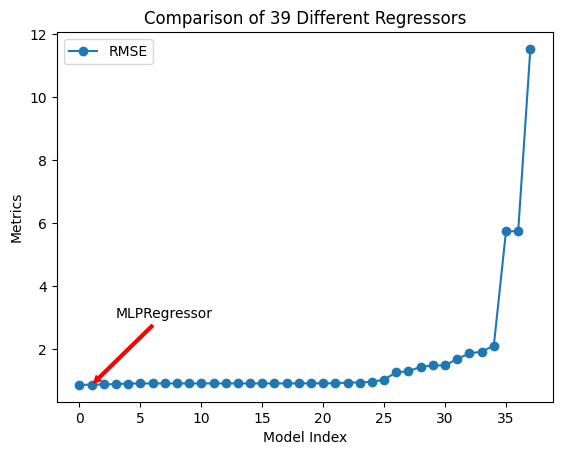

In [69]:
idx = [i for i in range(38)]
plt.plot(idx, models["RMSE"][:38]  , label = "RMSE" , marker = 'o' )


plt.annotate(models.index[0] , 
             (1,models["RMSE"][0]) , 
             xytext  =(3,3),
             arrowprops = dict(
                               arrowstyle = "simple",
                 color = "red"
                              ))

plt.xlabel("Model Index")
plt.ylabel("Metrics")
plt.title("Comparison of 39 Different Regressors")
plt.legend()
plt.show()

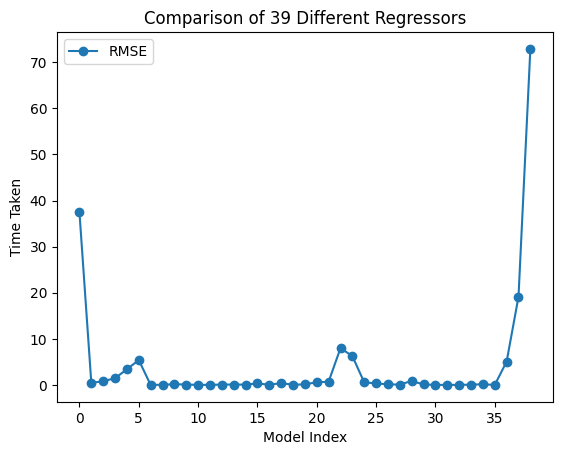

In [74]:
idx = [i for i in range(39)]
plt.plot(idx, models["Time Taken"] , label = "RMSE" ,marker = "o" )
plt.xlabel("Model Index")
plt.ylabel("Time Taken")
plt.title("Comparison of 39 Different Regressors")
plt.legend()
plt.show()

In [73]:
models[0:15]

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
MLPRegressor,0.98,0.98,0.87,37.44
LGBMRegressor,0.98,0.98,0.88,0.46
HistGradientBoostingRegressor,0.98,0.98,0.89,0.82
GradientBoostingRegressor,0.98,0.98,0.90,1.48
ExtraTreesRegressor,0.97,0.97,0.92,3.41
RandomForestRegressor,0.97,0.97,0.92,5.41
Ridge,0.97,0.97,0.92,0.02
RidgeCV,0.97,0.97,0.92,0.05
BayesianRidge,0.97,0.97,0.92,0.18
